In [1]:
%matplotlib inline
%load_ext Cython

import h10
import matplotlib.pyplot as plt
import numpy as np
import boost_histogram as bh
import functools
import operator

from tqdm import tqdm

from glob import glob
import concurrent
from multiprocessing import Pool

def good_event(event):
    if event.dc_sect.size == 0 or event.dc_vz.size == 0:
        return False
    if event.p.size == 0:
        return False
    
    return True
    

In [2]:
def run_file(root_reader):
    vz = dict()
    vz_vs_phi = dict()

    vz_vs_phi_all = bh.Histogram(bh.axis.Regular(100, -6, 10), bh.axis.Regular(100, -np.pi, np.pi))


    for i in range(1, 7):
        vz[i] = bh.Histogram(bh.axis.Regular(100, -6, 10))
        vz_vs_phi[i] = bh.Histogram(bh.axis.Regular(100, -6, 10), 
                                    bh.axis.Regular(100, -np.pi, np.pi))

    with tqdm(total=root_reader.num_entries) as pbar:
        for event in root_reader:
            pbar.update(1)
            if not good_event(event):
                continue

            sector = event.dc_sect[0]

            vz[sector].fill(event.dc_vz[0])

            phi = np.arctan2(event.cx[0], event.cy[0])
            vz_vs_phi[sector].fill(event.dc_vz[0], phi)
            vz_vs_phi_all.fill(event.dc_vz[0], phi)



    return {'vz': vz,'vz_vs_phi': vz_vs_phi,'vz_vs_phi_all': vz_vs_phi_all}

In [3]:
#data_reader = h10.h10_data()
#data_reader.add("/Volumes/LaCiE/physics/e1d/v2/H2_full/h10_r230*")

empty_reader = h10.h10_data()
empty_reader.add("/Users/tylern/Data/e1d/empty/*.root")

In [4]:
#full = run_file(data_reader)
empty = run_file(empty_reader)



3915832it [08:47, 7419.59it/s]                             


In [14]:
vz = empty['vz']
vz_vs_phi = empty['vz_vs_phi']
vz_vs_phi_all = empty['vz_vs_phi_all']

-2.5599999999999996
-2.5599999999999996
-2.7200000000000006
-3.1999999999999997
-3.1999999999999997
-2.880000000000001


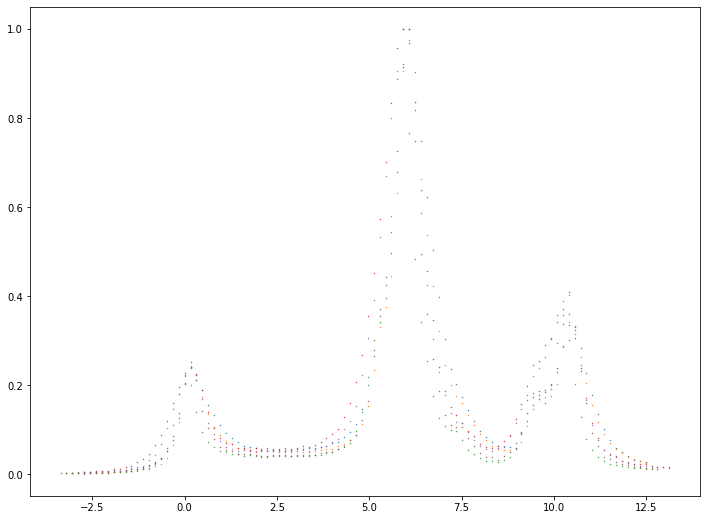

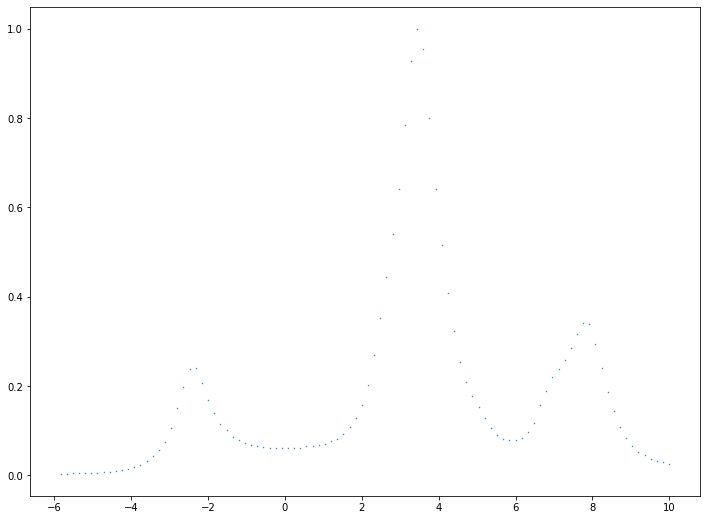

In [15]:
fig, ax = plt.subplots(figsize=[12,9])
total = bh.Histogram(bh.axis.Regular(100, -6, 10))
for i in range(1, 7):
    total = total + vz[i]
    y, x = vz[i].to_numpy()
    y = y / np.max(y)
    x = (x[1:] + x[:-1]) / 2.0

    x_val = np.where(y >= 0.2)[0][0]
    print(x[x_val])
    
    ax.scatter(x-x[x_val],y, s=0.2)


fig1, ax1 = plt.subplots(figsize=[12,9])
y1, x1 = total.to_numpy()
y1 = y1 / np.max(y1)
ax1.scatter(x1[1:],y1, s=0.2)

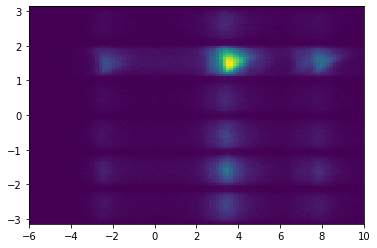

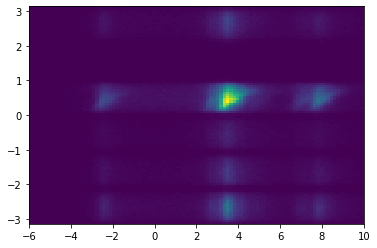

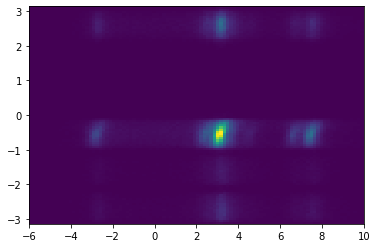

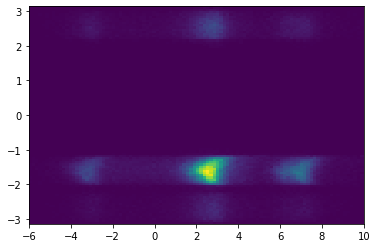

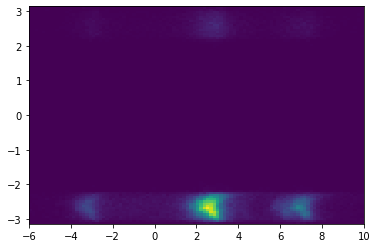

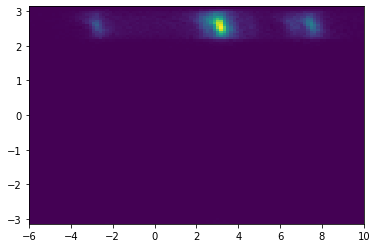

In [16]:
for i in range(1,7):
    # Compute the areas of each bin
    areas = functools.reduce(operator.mul, vz_vs_phi[i].axes.widths)

    # Compute the density
    density = vz_vs_phi[i].view() / vz_vs_phi[i].sum() / areas

    # Make the plot
    fig, ax = plt.subplots()
    mesh = ax.pcolormesh(*vz_vs_phi[i].axes.edges.T, density.T)

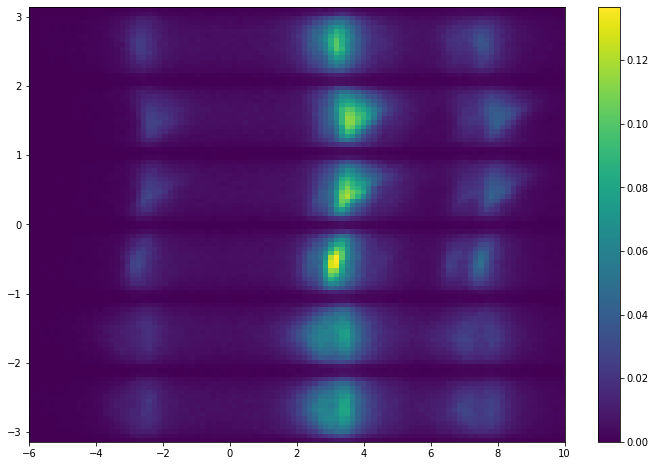

In [17]:
# Compute the areas of each bin
areas = functools.reduce(operator.mul, vz_vs_phi_all.axes.widths)

# Compute the density
density = vz_vs_phi_all.view() / vz_vs_phi_all.sum() / areas

# Make the plot
fig, ax = plt.subplots(figsize=[12,8])
mesh = ax.pcolormesh(*vz_vs_phi_all.axes.edges.T, density.T)
fig.colorbar(mesh, ax=ax)

In [18]:
# Compute the areas of each bin
areas = functools.reduce(operator.mul, w_vs_q2.axes.widths)

# Compute the density
density = w_vs_q2.view() / w_vs_q2.sum() / areas

# Make the plot
fig, ax = plt.subplots(figsize=[12,8])
mesh = ax.pcolormesh(*w_vs_q2.axes.edges.T, density.T)
fig.colorbar(mesh, ax=ax)

NameError: name 'w_vs_q2' is not defined